### Importing necessary libraries

In [1]:
# Data manipulation and visulization and handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### NMF
from sklearn.decomposition import NMF

## clustering lib.
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

### Loading the data-set

In [2]:
df = pd.read_csv('spotify.xls',index_col=0)

In [3]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [4]:
df.shape

(1000, 5000)

### Problem Statement 
- Build a recommendation engine using user listining history.

In [5]:
x = df.values
x

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

### NMF

NMF is a form of Topic Modelling — the art of extracting meaningful themes that recur through a corpus of documents. A corpus is composed of a set of topics embedded in its documents. A document is composed of a hierarchy of topics. A topic is composed of a hierarchy of terms.

In [6]:
nmf = NMF(n_components=100,max_iter=1000,random_state=3)

In [7]:
nmf.fit(x)

NMF(max_iter=1000, n_components=100, random_state=3)

In [8]:
user_matrix = nmf.transform(x)
song_matrix = nmf.components_.T

In [9]:
user_matrix.shape

(1000, 100)

In [10]:
song_matrix.shape

(5000, 100)

In [11]:
user_matrix

array([[0.11406804, 0.00893885, 0.0485635 , ..., 0.        , 0.        ,
        0.6135531 ],
       [0.12688492, 0.00190411, 0.        , ..., 0.        , 0.28640986,
        0.4889945 ],
       [0.16592789, 0.        , 0.        , ..., 0.        , 0.        ,
        0.5284677 ],
       ...,
       [0.        , 0.01646383, 0.00428361, ..., 0.00550799, 0.32831032,
        0.43486855],
       [0.18670744, 0.        , 0.        , ..., 0.        , 0.        ,
        0.61143342],
       [0.01915003, 0.00716057, 0.01531888, ..., 0.00532154, 0.        ,
        0.60172871]])

In [12]:
song_matrix

array([[ 4.14156894,  0.        , 11.87931929, ...,  0.93944426,
         6.78684224,  5.65644275],
       [ 3.64483632,  7.58514655,  0.        , ...,  1.44220399,
         8.52029098,  5.1525928 ],
       [ 4.04813185, 10.43677048,  5.94969038, ...,  6.11269407,
         7.164265  ,  5.42245217],
       ...,
       [ 3.4318137 , 26.98163173, 15.68088812, ...,  2.44361735,
         7.43032225,  5.20597238],
       [ 4.22782543,  0.        ,  0.        , ...,  3.26779781,
         6.94381596,  5.37784402],
       [ 0.21935755, 35.54376171,  0.        , ...,  5.69967641,
         5.26087718,  6.77853971]])

## Steps to bulid recommender system - type1(for local lib. or samll data set)
1. Consider recommending songs to 1st user (row location 0 in user matrix)
2. Find euclideain distance between this 1st user and remaining 999 user.
3. Find top 10 songs heard by nearest 5 users.
4. Recommend this 10 song to 1st user.

Calculating distance between 2 users

In [13]:
def col_dist(u1,u2):
    return pow(sum(pow((u1[x]-u2[x]),2)for x in range(len(u1))),0.5)

In [14]:
col_dist(user_matrix[0],user_matrix[1])

0.3243047282337115

In [15]:
from platform import python_version

print(python_version())

3.9.13


In [16]:
# buser is for base user(from which we are finding distance from 999 users)
def distance_from_rem_users(buser,user_matrix):
    dist = []
    for i in range(len(user_matrix)):
        if buser!= i:
            dist.append(col_dist(user_matrix[buser],user_matrix[i]))
    return dist
            

In [17]:
dist_user1 = distance_from_rem_users(0,user_matrix)

In [18]:
dist_user1

[0.3243047282337115,
 0.1436299643721041,
 0.4020909731384654,
 0.2300091737747753,
 0.2114701578423337,
 0.6695448750927433,
 0.6512943047928335,
 0.19293088960249385,
 0.3892042231560432,
 0.34606591125846947,
 0.16566861623126342,
 0.12078014311404399,
 0.3665948924837123,
 0.26542080546869484,
 0.14093102411775899,
 0.1406420014580616,
 0.2231390316165262,
 0.4619632739334677,
 0.210687966333144,
 0.10265895631349066,
 0.4717000002165362,
 0.3306269644595062,
 0.36285225983362307,
 0.6094233746266142,
 0.3759989963754246,
 0.4048833298106964,
 0.9865400770983104,
 0.600172395289689,
 0.32595609325939906,
 0.5773852484523397,
 0.3776062639610016,
 0.3930737560017882,
 0.15003173913487242,
 0.4110852480874848,
 0.26740144211936645,
 0.13844077232276686,
 0.17467132035419336,
 0.15865355506884468,
 0.4349179547342288,
 0.523807075697484,
 0.19242003092572224,
 0.1821317672191343,
 0.49221722723076883,
 0.15058941950255753,
 0.16627090112694792,
 0.4965189327436604,
 0.1999787400146874

### Finding nearest 5 users

In [19]:
'''def dist_from_rem_users(buser, user_matrix):  # buser = base user
    dist = []
    for i in range(len(user_matrix)):
        if buser != i:
            dist.append(col_dist(user_matrix[buser], user_matrix[i]))


    distanceDF = pd.DataFrame(dist)
    distanceDF.columns=["Distance"]    
    print(distanceDF.sort_values("Distance", axis=0, ascending=True, kind="quicksort", inplace=True))
    print(distanceDF[0:6])
    return dist
'''

'def dist_from_rem_users(buser, user_matrix):  # buser = base user\n    dist = []\n    for i in range(len(user_matrix)):\n        if buser != i:\n            dist.append(col_dist(user_matrix[buser], user_matrix[i]))\n\n\n    distanceDF = pd.DataFrame(dist)\n    distanceDF.columns=["Distance"]    \n    print(distanceDF.sort_values("Distance", axis=0, ascending=True, kind="quicksort", inplace=True))\n    print(distanceDF[0:6])\n    return dist\n'

In [20]:
nearest_users = np.argsort(dist_user1)[:5]

In [21]:
nearest_users

array([206, 608, 584, 313, 459], dtype=int64)

In [22]:
for i in range(len(nearest_users)):
    nearest_users[i]+=1
print(nearest_users)

[207 609 585 314 460]


### Finding the most heard songs by this user

In [23]:
for i in nearest_users:
    print("Songs heard by user",i,"are: ")
    temp = df.iloc[i]
    print(temp[temp.values != 0].index)

Songs heard by user 207 are: 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4663)
Songs heard by user 609 are: 
Index(['song_1', 'song_2', 'song_4', 'song_5', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4698)
Songs heard by user 585 are: 
Index(['song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', le

Picking out top 10 songs from above list of songs.

In [24]:
def topNsongs(nearest_users,df,N):
    temp = df.iloc[nearest_users]
    dict1 = temp.max().to_dict()
    #print(dict1)
    
    #converting every key-value pair into a tuple and swaping them for sorting purpose, end result is a list of song and no. of time heard tuple
    sorted_dict = sorted(dict1.items() , key = lambda keyvalue:(keyvalue[1],keyvalue[0]),reverse=True)[:N]
    print(sorted_dict)
    return[x[1] for x in sorted_dict]
    #return 0

In [25]:
topNsongs(nearest_users,df,10)

[('song_996', 15), ('song_984', 15), ('song_983', 15), ('song_978', 15), ('song_976', 15), ('song_974', 15), ('song_972', 15), ('song_971', 15), ('song_969', 15), ('song_966', 15)]


[15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

## Type 2 Recommendation system for larger data-sets

K-Means Clustering

In [26]:
WCSS = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(song_matrix)
    WCSS[k] = kmeans.inertia_

In [27]:
WCSS

{1: 1208534872.4370337,
 2: 1101067727.418368,
 3: 1061351065.6830984,
 4: 1034965417.3097932,
 5: 1016969968.2797279,
 6: 994594621.3166482,
 7: 983086041.7313304,
 8: 966890591.189329,
 9: 955240285.617325,
 10: 947948030.0548809,
 11: 938283759.413598,
 12: 935314068.5206354,
 13: 925637455.3475716,
 14: 916403031.1964145,
 15: 912855654.1436001,
 16: 909789128.2570175,
 17: 902765247.6014075,
 18: 897905077.3872079,
 19: 893999391.7593471,
 20: 893750171.8101232,
 21: 887933918.9782758,
 22: 883716152.7441041,
 23: 882050841.9266953,
 24: 876982363.0589194,
 25: 878471255.9449803,
 26: 874273292.855841,
 27: 873526090.7428161,
 28: 869263724.4441999,
 29: 868102472.021424,
 30: 866802432.2860732,
 31: 863652289.1405079,
 32: 864241981.5599661,
 33: 861245098.0451661,
 34: 859135497.1646818,
 35: 855733024.8123119,
 36: 855173924.9692043,
 37: 850588740.452927,
 38: 851596106.5259268,
 39: 849421101.571288,
 40: 850062971.0151752,
 41: 846168309.6569772,
 42: 845819893.1596425,
 43:

Text(0, 0.5, 'WCSS')

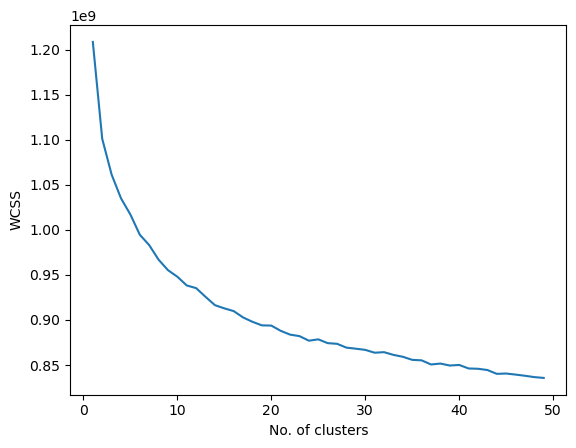

In [28]:
plt.plot(WCSS.keys(),WCSS.values())
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")

In [29]:
def songs_in_cluster(N_clusters,df,song_matrix,song_name,n_recommendations):
    kmeans = KMeans(n_clusters = N_clusters,max_iter=1000).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)
    #print(index_in_song)
    song_vector = song_matrix[index_in_song]
    #print(song_vector)
    all_songs_in_cluster = kmeans.predict(song_matrix)
    #print(len(all_songs_in_cluster))
    
    #Finding songs which belong to same cluster as of songs passed in song name
    
    songs_in_selected_cluster = [x for x in range(len(all_songs_in_cluster))
                                if all_songs_in_cluster[x] == kmeans.predict([song_vector])]
    #print(len(songs_in_selected_cluster))
    song_cluster = song_matrix[songs_in_selected_cluster]
    #print(song_cluster)
    neighbors = NearestNeighbors(n_neighbors = n_recommendations)
    neighbors.fit(song_cluster)
    
    
    
    recommended_songs = neighbors.kneighbors([song_matrix[index_in_song]])
    #print(recommended_songs[1][0])
    songs = df.columns
    return [songs[x] for x in recommended_songs[1][0]]

    
    

In [30]:
songs_in_cluster(15,df,song_matrix,'song_5',5)

['song_1', 'song_132', 'song_196', 'song_163', 'song_295']

In [31]:
song_matrix

array([[ 4.14156894,  0.        , 11.87931929, ...,  0.93944426,
         6.78684224,  5.65644275],
       [ 3.64483632,  7.58514655,  0.        , ...,  1.44220399,
         8.52029098,  5.1525928 ],
       [ 4.04813185, 10.43677048,  5.94969038, ...,  6.11269407,
         7.164265  ,  5.42245217],
       ...,
       [ 3.4318137 , 26.98163173, 15.68088812, ...,  2.44361735,
         7.43032225,  5.20597238],
       [ 4.22782543,  0.        ,  0.        , ...,  3.26779781,
         6.94381596,  5.37784402],
       [ 0.21935755, 35.54376171,  0.        , ...,  5.69967641,
         5.26087718,  6.77853971]])

In [32]:
a = kmeans.predict(song_matrix)

In [33]:
song_matrix.shape

(5000, 100)